In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
descriptive_prompt_8 =  "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD of the simulation at 300 K. 5. Compute the radius of gyration over time for the simulation at 300 K. 6. Simulate for 1 ps at 400 K. 7. Compute the RMSD of the simulation at 400 K. 8. Compute the radius of gyration over time for the simulation at 400 K."
non_descriptive_prompt_8 = "Simulate 1LYZ for 1 ps at 300K and 400K. Tell me how many residues are in the chains and beta sheets, and compute the RMSD and radius of gyration of both simulations."

Required Tasks:
- Download
- SS Analysis
- Simulation_1
- RMSD_1
- Rgy_1
- Simulation_2
- RMSD_2
- Rgy_2

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(descriptive_prompt_8)

Thought: To complete all these tasks, I'll need to use several tools in sequence. Let's start with downloading the PDB file for 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we've successfully downloaded the PDB file for 1LYZ. Now, let's analyze the structure to determine the number of residues in the chains and beta sheets.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_005427",
        "top_file": "1LYZ_005427",
        "target_frames": "first"
    }
}
```Thought: We've obtained information about the secondary structure of 1LYZ. Now, let's proceed with the simulation at 300 K for 1 ps.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_005427",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "PME",
 

KeyError: 'Pressure'

In [5]:
registry = agent_1.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_005427: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_005427
 rec0_005430: dssp values for trajectory with id: 1LYZ_005427
 1LYZ_005444: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 


In [6]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(non_descriptive_prompt_8)

Thought: To address this question, we need to follow several steps. First, we'll download the PDB file for 1LYZ, set up and run simulations at 300K and 400K, analyze the structure, and then compute the requested metrics. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's set up and run the simulations at 300K and 400K. We'll start with the 300K simulation.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_005536",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constraintTolerance": 0.000001
    

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [10]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_005536: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_005536
 1LYZ_005557: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_005605: Initial positions for simulation sim0_005605
 sim0_005605: Basic Simulation of Protein 1LYZ_005557
 rec0_005607: Simulation trajectory for protein 1LYZ_005557 and simulation sim0_005605
 rec1_005607: Simulation state log for protein 1LYZ_005557 and simulation sim0_005605
 rec2_005607: Simulation pdb frames for protein 1LYZ_005557 and simulation sim0_005605
 top_sim0_005740: Initial positions for simulation sim0_005740
 sim0_005740: Basic Simulation of Protein 1LYZ_005557
 rec0_005740: Simulation trajectory for protein 1LYZ_005557 and simulation sim0_005740
 rec1_005740: Simulation state log for protein 1LYZ_005557 and simulation sim0_005740
 rec2_005740: Simulation pdb frames for protein 1LYZ_0055

In [11]:
traj_path_1 = registry_2.get_mapped_path("rec0_005607")
top_path_1 = registry_2.get_mapped_path("top_sim0_005605")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)
assert os.path.exists(registry_2.get_mapped_path('rmsd_005605'))
assert os.path.exists(registry_2.get_mapped_path('rgy_rec0_005607'))


traj_path_2 = registry_2.get_mapped_path("rec0_005740")
top_path_2 = registry_2.get_mapped_path("top_sim0_005740")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)
assert os.path.exists(registry_2.get_mapped_path('fig0_010224'))
assert os.path.exists(registry_2.get_mapped_path('rgy_rec0_005740'))

In [15]:
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file="rec0_005607", top_file="top_sim0_005605", target_frames="last")

"{'residues in helix': 48, 'residues in strand': 12, 'residues in coil': 69, 'residues not assigned, not a protein residue': 0}"

In [14]:
traj = md.load(registry_2.get_mapped_path('1LYZ_005557'))
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  1
Number of sheets:  14
Number of helices:  50
Number of coils:  65


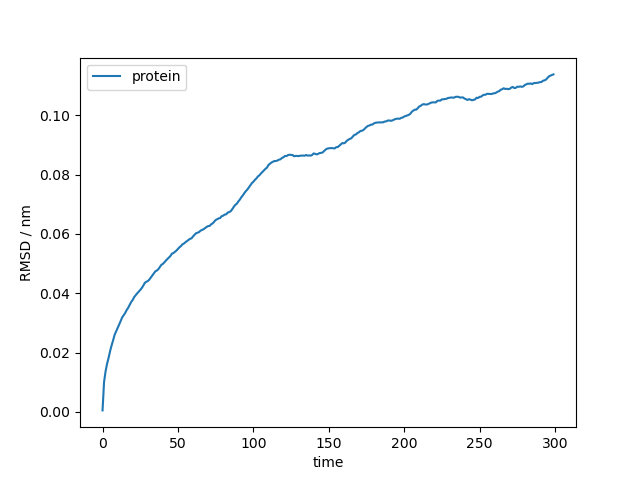

In [17]:
#plot rmsd
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_010214'))

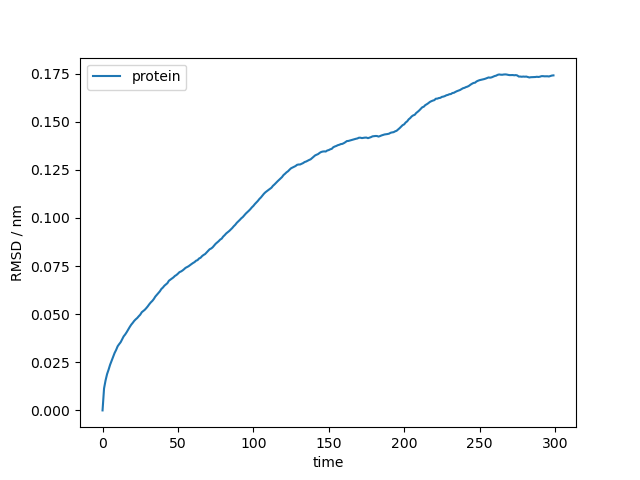

In [18]:
Image(filename=registry_2.get_mapped_path('fig0_010224')) 